# Libs

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns

# Data Import

In [78]:
data = sns.load_dataset("diamonds")

In [79]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Data Analyze

In [80]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [81]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [82]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [84]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [86]:
from pandas.api.types import CategoricalDtype
df.cut=df.cut.astype(CategoricalDtype(categories = ["Ideal","Premium","Very Good","Good","Fair"],ordered =True))

# Graphics

# Barplot

<AxesSubplot:xlabel='cut'>

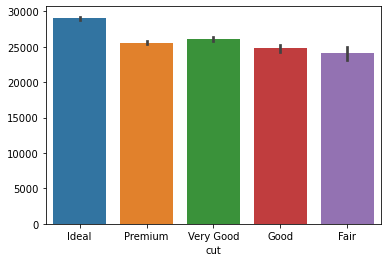

In [14]:
sns.barplot(x="cut",y=df.cut.index,data=df)

<AxesSubplot:xlabel='cut'>

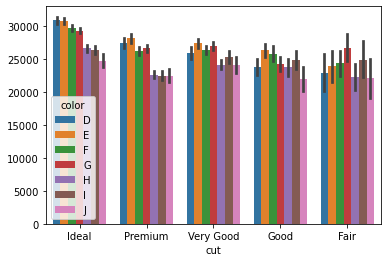

In [15]:
sns.barplot(x="cut",y=df.cut.index,hue="color",data=df)

# Catplot and groupby

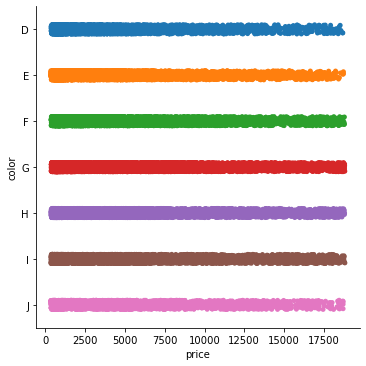

In [18]:
sns.catplot(x = "price" , y = "color", data = df)

In [19]:
df.groupby(["cut","color"])["price"].mean()

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

# Histplot - Kdeplot - FacetGrid

In [26]:
?sns.histplot

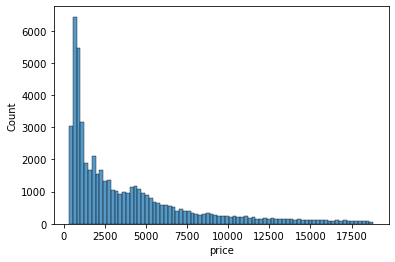

In [52]:
sns.histplot(df.price);

<AxesSubplot:xlabel='price', ylabel='Density'>

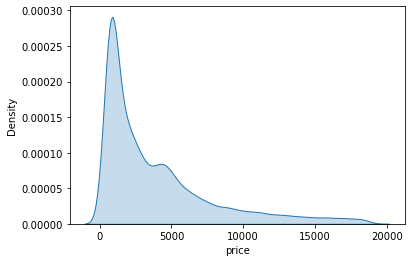

In [53]:
sns.kdeplot(df.price,shade=True)

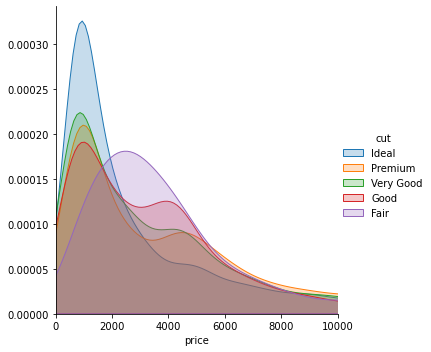

In [88]:
(sns
 .FacetGrid(df,
            hue="cut",
            height=5,
            xlim=(0,10000))
 .map(sns.kdeplot,"price",shade=True)
 .add_legend()
);

# catplot point

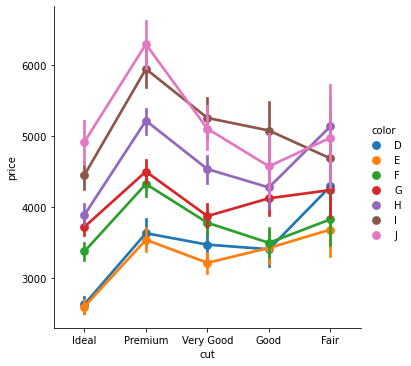

In [89]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df);

In [91]:
nData= sns.load_dataset("tips")
df=nData.copy()

In [92]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


# Boxplot

<AxesSubplot:xlabel='total_bill'>

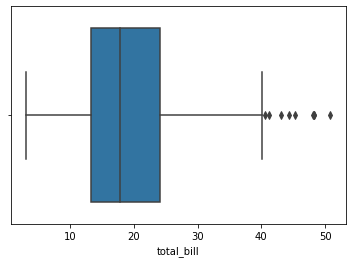

In [96]:
sns.boxplot(x=df["total_bill"])

<AxesSubplot:xlabel='size', ylabel='total_bill'>

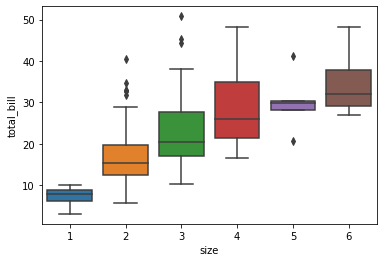

In [113]:
sns.boxplot(x="size",y="total_bill",data=df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

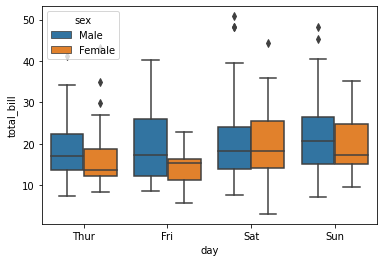

In [115]:
sns.boxplot(x="day",y="total_bill",hue ="sex",data=df)

# catplot violin

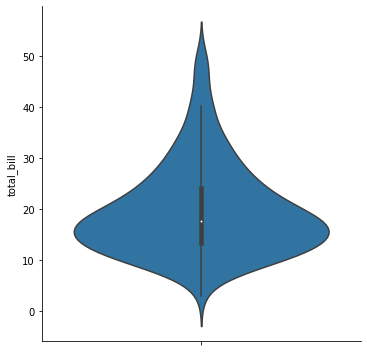

In [117]:
sns.catplot(y="total_bill",kind="violin",data=df)

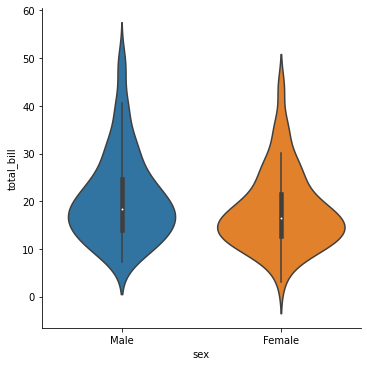

In [118]:
sns.catplot(x="sex",y="total_bill",kind="violin",data=df)

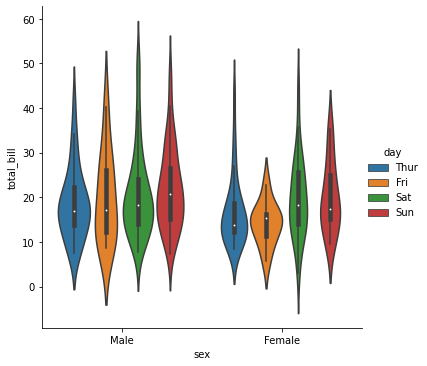

In [119]:
sns.catplot(x="sex",y="total_bill",hue="day",kind="violin",data=df)

# Scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

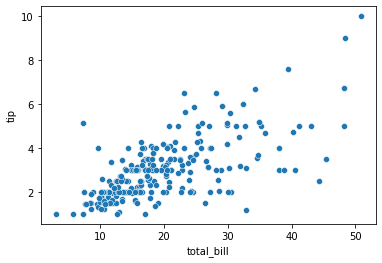

In [124]:
sns.scatterplot(x="total_bill",y="tip",data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

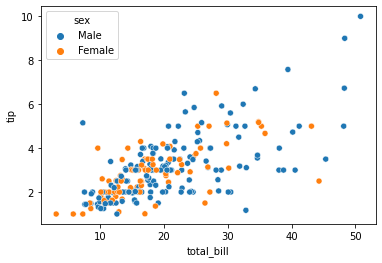

In [126]:
sns.scatterplot(x="total_bill",y="tip",hue="sex",data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

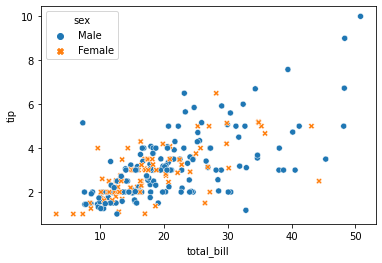

In [128]:
sns.scatterplot(x="total_bill",y="tip",hue="sex",style="sex",data=df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

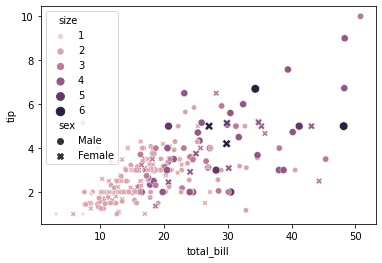

In [134]:
sns.scatterplot(x="total_bill",y="tip",hue="size",style="sex",size="size",data=df)

In [130]:
?sns.scatterplot

# lmplot

In [136]:
import matplotlib as plt

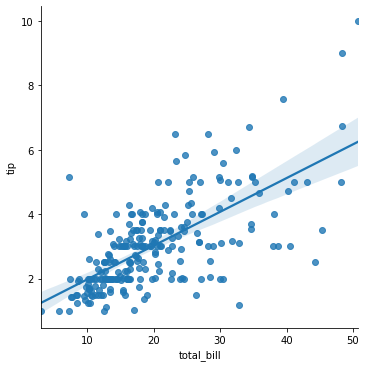

In [138]:
sns.lmplot(x="total_bill",y="tip",data=df)

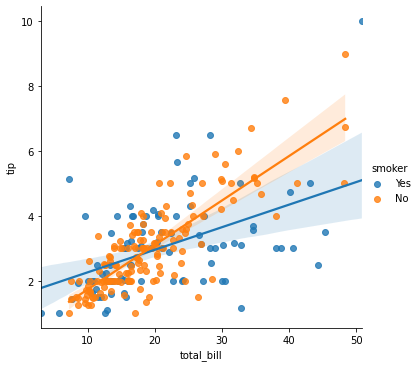

In [139]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=df)

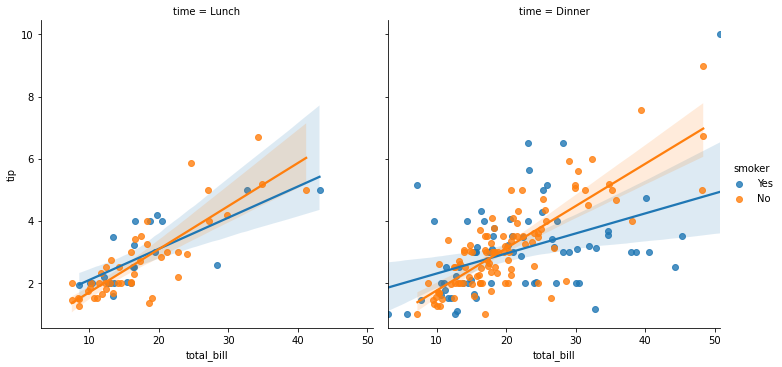

In [140]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=df)

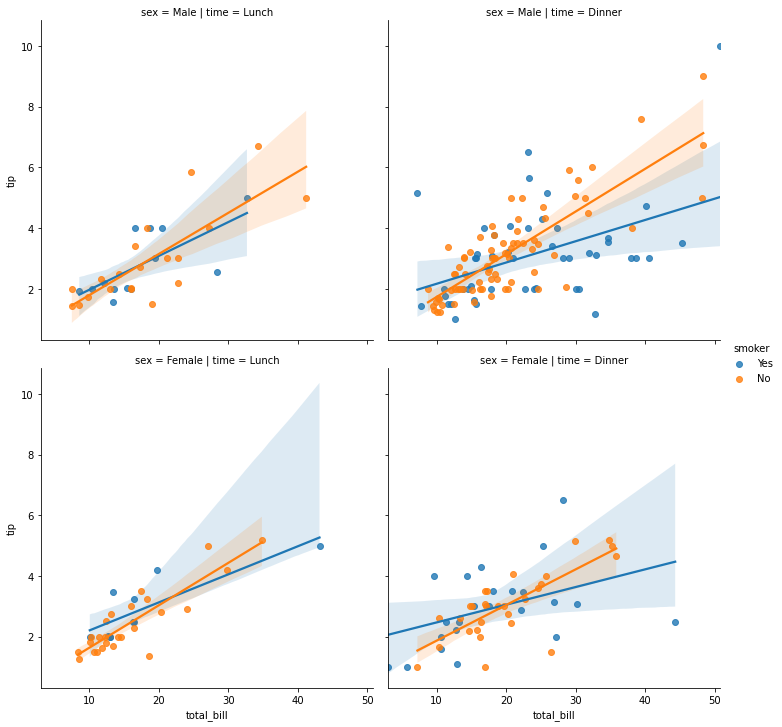

In [142]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=df)

In [143]:
nnData=sns.load_dataset("iris")
df=nnData.copy()

In [144]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [154]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [153]:
df.species=df.species.astype(CategoricalDtype())

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


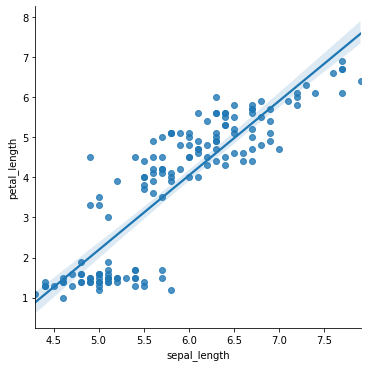

In [155]:
sns.lmplot(x="sepal_length",y="petal_length",data=df)

# pairplot

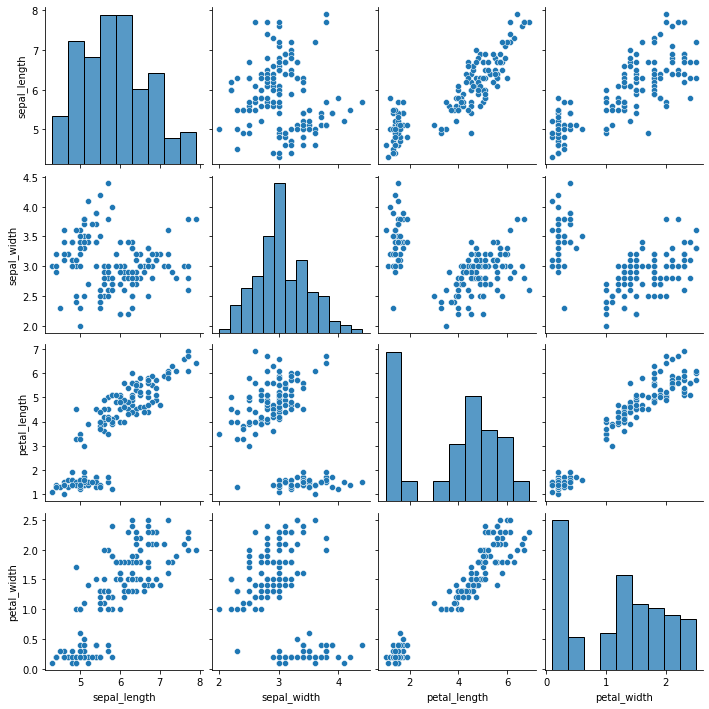

In [156]:
sns.pairplot(df)

In [157]:
?sns.pairplot

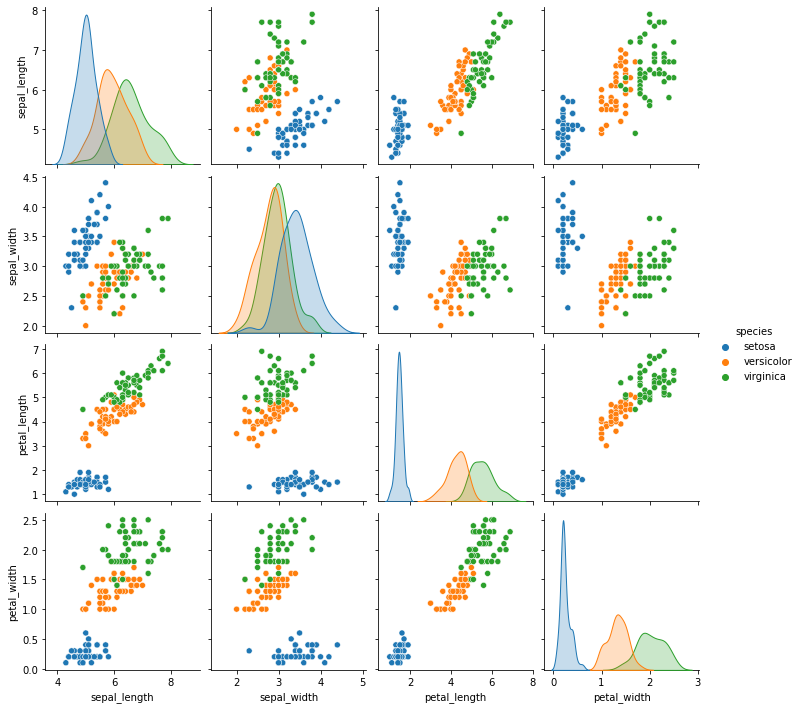

In [159]:
sns.pairplot(hue="species",data=df)

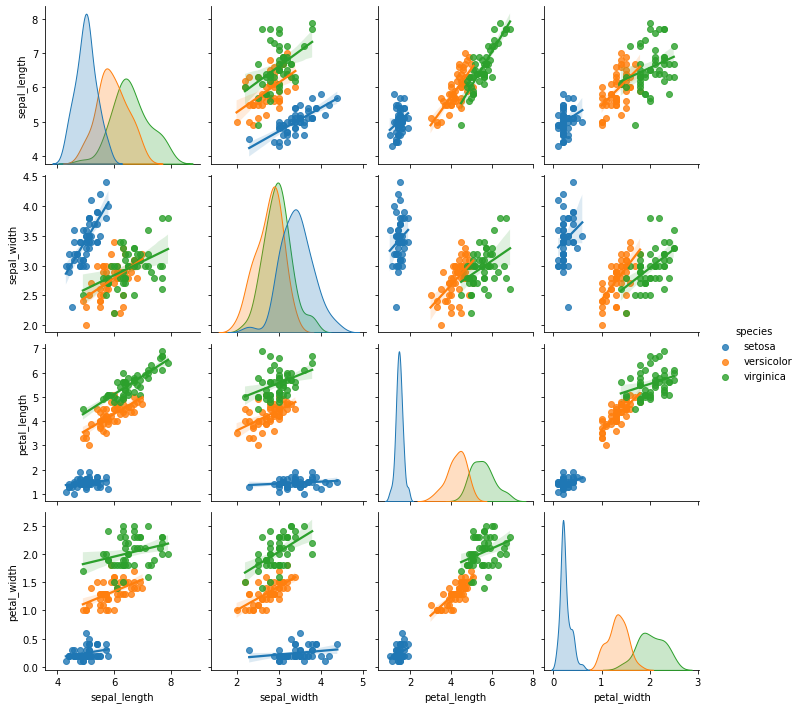

In [160]:
sns.pairplot(hue="species",kind="reg",data=df)

In [161]:
nnnData=sns.load_dataset("flights")
df=nnnData.copy()

In [162]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [163]:
df.info

<bound method DataFrame.info of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]>

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [166]:
df.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [167]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

# pivot and heatmap

In [168]:
df=df.pivot("month","year","passengers")

In [169]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

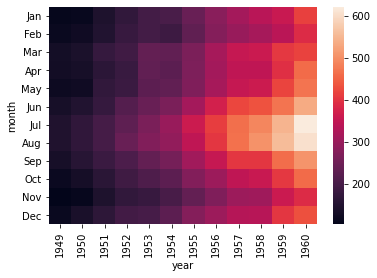

In [170]:
sns.heatmap(df)

In [171]:
?sns.heatmap

<AxesSubplot:xlabel='year', ylabel='month'>

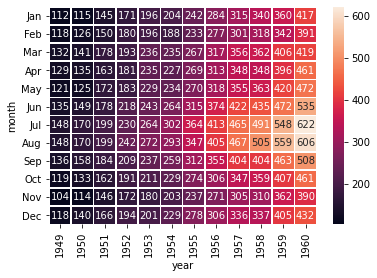

In [178]:
sns.heatmap(df,annot =True,fmt="d",linewidths =.5)

In [210]:
fmri=sns.load_dataset("fmri")
df=fmri.copy()
df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [181]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [207]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


# lineplot

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

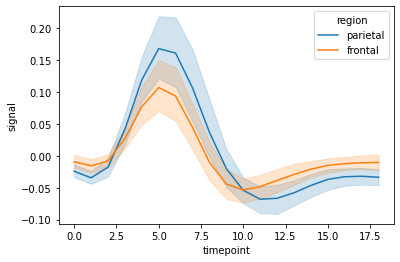

In [211]:
sns.lineplot(x="timepoint",y="signal",hue="region",data=df)

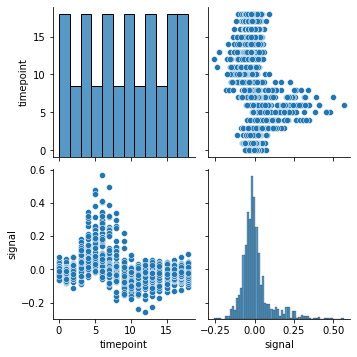

In [212]:
sns.pairplot(df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

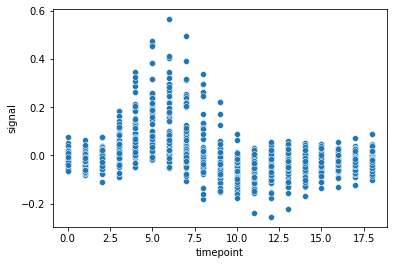

In [213]:
sns.scatterplot(x="timepoint",y="signal",data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

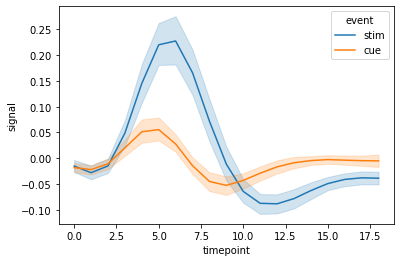

In [215]:
sns.lineplot(x="timepoint",y="signal",hue="event",data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

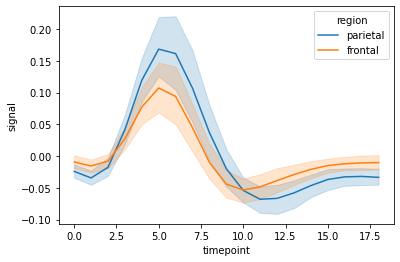

In [220]:
sns.lineplot(x="timepoint",y="signal",hue="region",data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

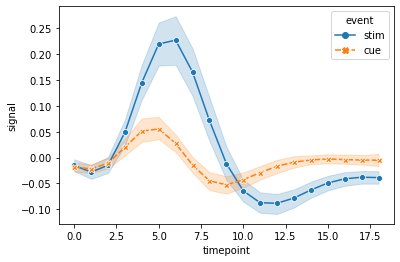

In [224]:
sns.lineplot(x="timepoint",y="signal",
             hue="event",style ="event",
             markers=True,data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

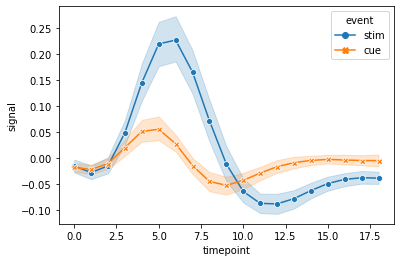

In [225]:
sns.lineplot(x="timepoint",y="signal",
             hue="event",style ="event",
             markers=True, dashes = False,
             data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

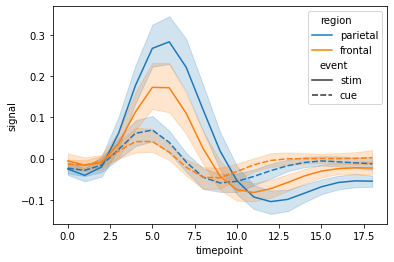

In [227]:
sns.lineplot(x="timepoint",y="signal",
             hue="region",style ="event",
             data=df)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

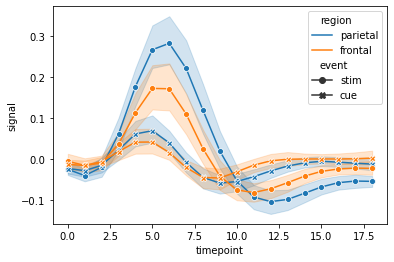

In [228]:
sns.lineplot(x="timepoint",y="signal",
             hue="region",style ="event",
             markers=True, dashes = False,
             data=df)

# install library and get_data_yahoo

In [229]:
!pip install pandas_datareader
import pandas_datareader as pr

In [230]:
df=pr.get_data_yahoo("AAPL",start="2016-01-01",end="2021-01-01")

In [231]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
High,1259.0,5.226557e+01,2.641440e+01,2.291750e+01,3.568500e+01,4.434000e+01,5.732500e+01,1.387900e+02
Low,1259.0,5.116255e+01,2.556245e+01,2.236750e+01,3.525750e+01,4.363000e+01,5.648000e+01,1.343400e+02
Open,1259.0,5.169946e+01,2.601345e+01,2.250000e+01,3.547375e+01,4.387000e+01,5.698500e+01,1.380500e+02
Close,1259.0,5.174199e+01,2.600212e+01,2.258500e+01,3.545375e+01,4.397000e+01,5.679000e+01,1.366900e+02
Volume,1259.0,1.336396e+08,6.151896e+07,4.544800e+07,9.310420e+07,1.167600e+08,1.558982e+08,5.334788e+08
Adj Close,1259.0,5.051693e+01,2.643642e+01,2.113440e+01,3.367296e+01,4.260131e+01,5.557379e+01,1.364861e+02


<AxesSubplot:xlabel='High', ylabel='Adj Close'>

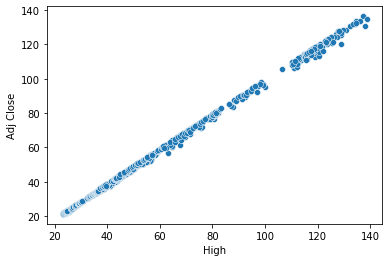

In [233]:
sns.scatterplot(x="High",y="Adj Close",data=df)

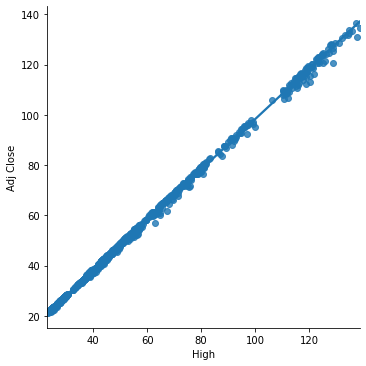

In [234]:
sns.lmplot(x="High",y="Adj Close",data=df)

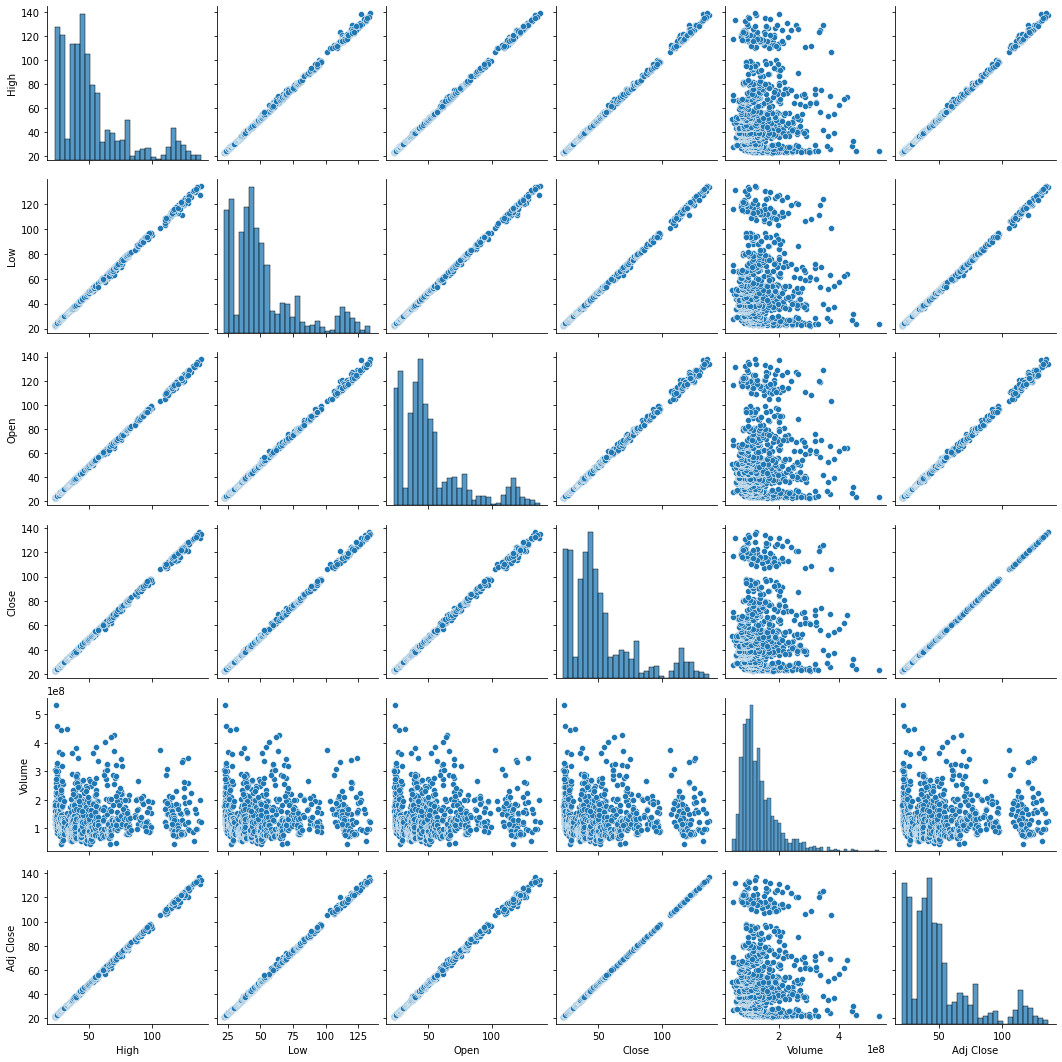

In [235]:
sns.pairplot(df)